In [2]:
# !pip install opencv-python
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline



____________________________________________________________________

In [15]:
# !pip install pixellib
# !pip install tensorflow
import pixellib
from pixellib.tune_bg import alter_bg

change_bg = alter_bg(model_type = "pb")
change_bg.load_pascalvoc_model("xception_pascalvoc.pb")

In [16]:
img_path='images/2020-05-12_20-07-45_UTC.jpg'
final=change_bg.color_bg(img_path,colors=(0,255,0), output_image_name="new_pink_img.jpg", detect = "person")
# cv2.imshow(final)

______________

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#img=cv2.imread("/content/new_img.jpg")

img2=cv2.imread('new_pink_img.jpg')

model2=KMeans(n_clusters=5)


def palette(clusters_centers):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/5
    for idx, centers in enumerate(clusters_centers): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

# image=cv2.imshow('', img2)
# plt.show(image)
clt_2 = model2.fit(img2.reshape(-1, 3))
print("Colors found in the image- ")
arr=model2.cluster_centers_
# cv2.imshow('', palette(arr))


Colors found in the image- 


In [7]:
#to print the colors
# cv2.imshow('ih', palette(arr))

In [8]:
#steps

#delete green color

# delete skin colors like shades of brown

# delete shades of black as it can be haircolor

# other prominent colors are the colors of the dress

skin_colors=[]





____________

In [9]:
image_2 = cv2.cvtColor(palette(arr), cv2.COLOR_BGR2RGB)
# cv2.imshow('',image_2)
plt.imsave('scale1.png',image_2)


In [10]:
from PIL import Image
from collections import defaultdict

im = Image.open('scale1.png')
by_color = defaultdict(int)
l = []
for pixel in im.getdata():
    by_color[pixel] += 1
x = []
y = []
by_color = list(by_color)

for i in by_color:
    i = list(i)
    for j in range(0,3):
        y.append(i[j])
    s = y.copy()
    x.append(s)
    y.clear()

print(x)

[[94, 71, 52], [0, 254, 1], [192, 188, 184], [236, 234, 234], [148, 136, 125]]


In [11]:
# !pip install webcolors
import webcolors
def hex2name(c):
    h_color = '#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2]))
    try:
        nm = webcolors.hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        #print("{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():
            cur_clr = webcolors.hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(c, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS3_NAMES_TO_HEX.items())[closest_color][0]
    return nm,h_color

In [12]:
color_list=[]
for i in x:
    name,hash=hex2name(i)
    print(hex2name(i))
    color_list.append(name)

('darkolivegreen', '#5e4734')
('lime', '#00fe01')
('silver', '#c0bcb8')
('linen', '#eceaea')
('gray', '#94887d')


In [20]:
# color_list.remove('lime')
# color_list[:-2]

ValueError: list.remove(x): x not in list

In [21]:
color_list

['darkolivegreen', 'silver', 'linen', 'gray']

In [3]:
img=cv2.imread("images/2020-05-12_20-07-45_UTC.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)


#show results
# cv2.imshow("1_HSV.jpg",HSV_result)
# cv2.imshow("2_YCbCr.jpg",YCrCb_result)
# cv2.imshow("3_global_result.jpg",global_result)
# cv2.imshow("Image.jpg",img)
cv2.imwrite("1_HSV.jpg",HSV_result)
cv2.imwrite("2_YCbCr.jpg",YCrCb_result)
cv2.imwrite("3_global_result.jpg",global_result)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [ ]:
#steps

# delete green color

# delete skin colors like shades of brown

# delete shades of black as it can be haircolor

# other prominent colors are the colors of the dress

The type of this input is <class 'numpy.ndarray'>
Shape: (1349, 1080, 3)


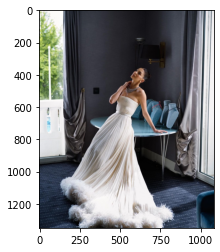

In [22]:
image = cv2.imread('images/2020-05-12_20-07-45_UTC.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [32]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [33]:
image = get_image('new_pink_img.jpg')
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [29]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x7fd65899ec10>,
 [Text(0.9855207446310813, 0.4886193425375208, '#454f5c'),
  Text(0.423761719581727, 1.0150990124205315, '#d2d2d3'),
  Text(-0.0532628078064869, 1.0987097311412917, '#0d0d10'),
  Text(-0.7756861438786062, 0.7799429506026311, '#858b92'),
  Text(-1.099313754373318, -0.038849317183708314, '#efeeef'),
  Text(-0.9581005878700563, -0.5404102733322643, '#33363f'),
  Text(-0.6520721051577065, -0.8858904953069522, '#202128'),
  Text(0.15232469572997498, -1.0894022154699203, '#6e6e65'),
  Text(0.9580306929437502, -0.5405341722571461, '#a0a96a'),
  Text(1.0970661834420972, -0.08028567212019183, '#b2b1b0')])

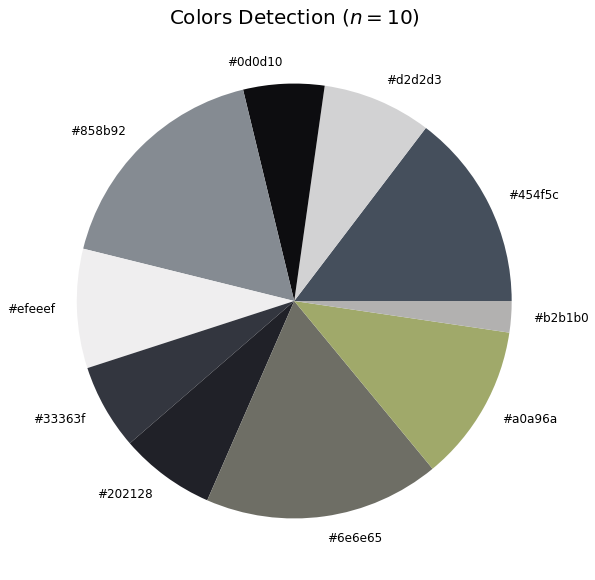

In [30]:
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [1]:
for i in range(len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

NameError: name 'rgb_colors' is not defined

In [ ]:
def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h/10) 
    w = int(inp_img.shape[1])
    step_w = int(w/10) 
    X = np.arange(0,h+step_h,step_h)
    Y =np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]

In [ ]:
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

In [ ]:
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+ rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square: '+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

In [ ]:
def build_summary():
    results = color_computing(image)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns= cols)
    k=0

    for r in results:
        d = {'Square Number':int(k)}
        for c in range(len(hex_colors)):
            d[hex_colors[c]] = r[c]*100/r.sum()
        sorted_results = sorted_results.append(d,ignore_index=True)
        k=k+1
    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [39]:
summary_df = build_summary()

/tmp/ipykernel_5556/3987575598.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(squares)[1::]
